In [17]:
import os,time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [18]:
### WineQT dataset

train_pths = ['/kaggle/input/wine-quality-dataset/WineQT.csv','/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv',
             '/kaggle/input/wine-quality/winequalityN.csv']
test_pth = '/kaggle/input/playground-series-s3e5/test.csv'

In [19]:
df1 = pd.read_csv(train_pths[0])
print(df1.columns)
print(df1.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')
(1143, 13)


In [20]:
df2 = pd.read_csv(train_pths[1])
print(df2.columns)
print(df2.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [21]:
df3 = pd.read_csv(train_pths[2])
print(df3.columns)
print(df3.shape)

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')
(6497, 13)


In [22]:
common_cols = list(set(df1.columns) & set(df2.columns) & set(df3.columns))
print(common_cols)

['citric acid', 'quality', 'chlorides', 'alcohol', 'total sulfur dioxide', 'density', 'residual sugar', 'free sulfur dioxide', 'fixed acidity', 'sulphates', 'pH', 'volatile acidity']


In [125]:
train_data = pd.concat([df1[common_cols],df2[common_cols],df3[common_cols]],axis=0,ignore_index=True)
print(train_data.shape)
train_data.head()

(9239, 12)


,citric acid,quality,chlorides,alcohol,total sulfur dioxide,density,residual sugar,free sulfur dioxide,fixed acidity,sulphates,pH,volatile acidity
0,0.00,5,0.076,9.4,34.0,0.9978,1.9,11.0,7.4,0.56,3.51,0.70
1,0.00,5,0.098,9.8,67.0,0.9968,2.6,25.0,7.8,0.68,3.20,0.88
2,0.04,5,0.092,9.8,54.0,0.9970,2.3,15.0,7.8,0.65,3.26,0.76
3,0.56,6,0.075,9.8,60.0,0.9980,1.9,17.0,11.2,0.58,3.16,0.28
4,0.00,5,0.076,9.4,34.0,0.9978,1.9,11.0,7.4,0.56,3.51,0.70


In [126]:
train_data.duplicated().sum()

3803

In [127]:
train_data = train_data.drop_duplicates(ignore_index=True)
print(train_data.shape)

(5436, 12)


In [137]:
num_cols = ['chlorides', 'density', 'residual sugar', 
            'volatile acidity', 'free sulfur dioxide', 'citric acid', 'fixed acidity', 
            'sulphates', 'pH', 'alcohol', 'total sulfur dioxide']

cat_cols = []
all_cols = num_cols + cat_cols

target_col = 'quality'

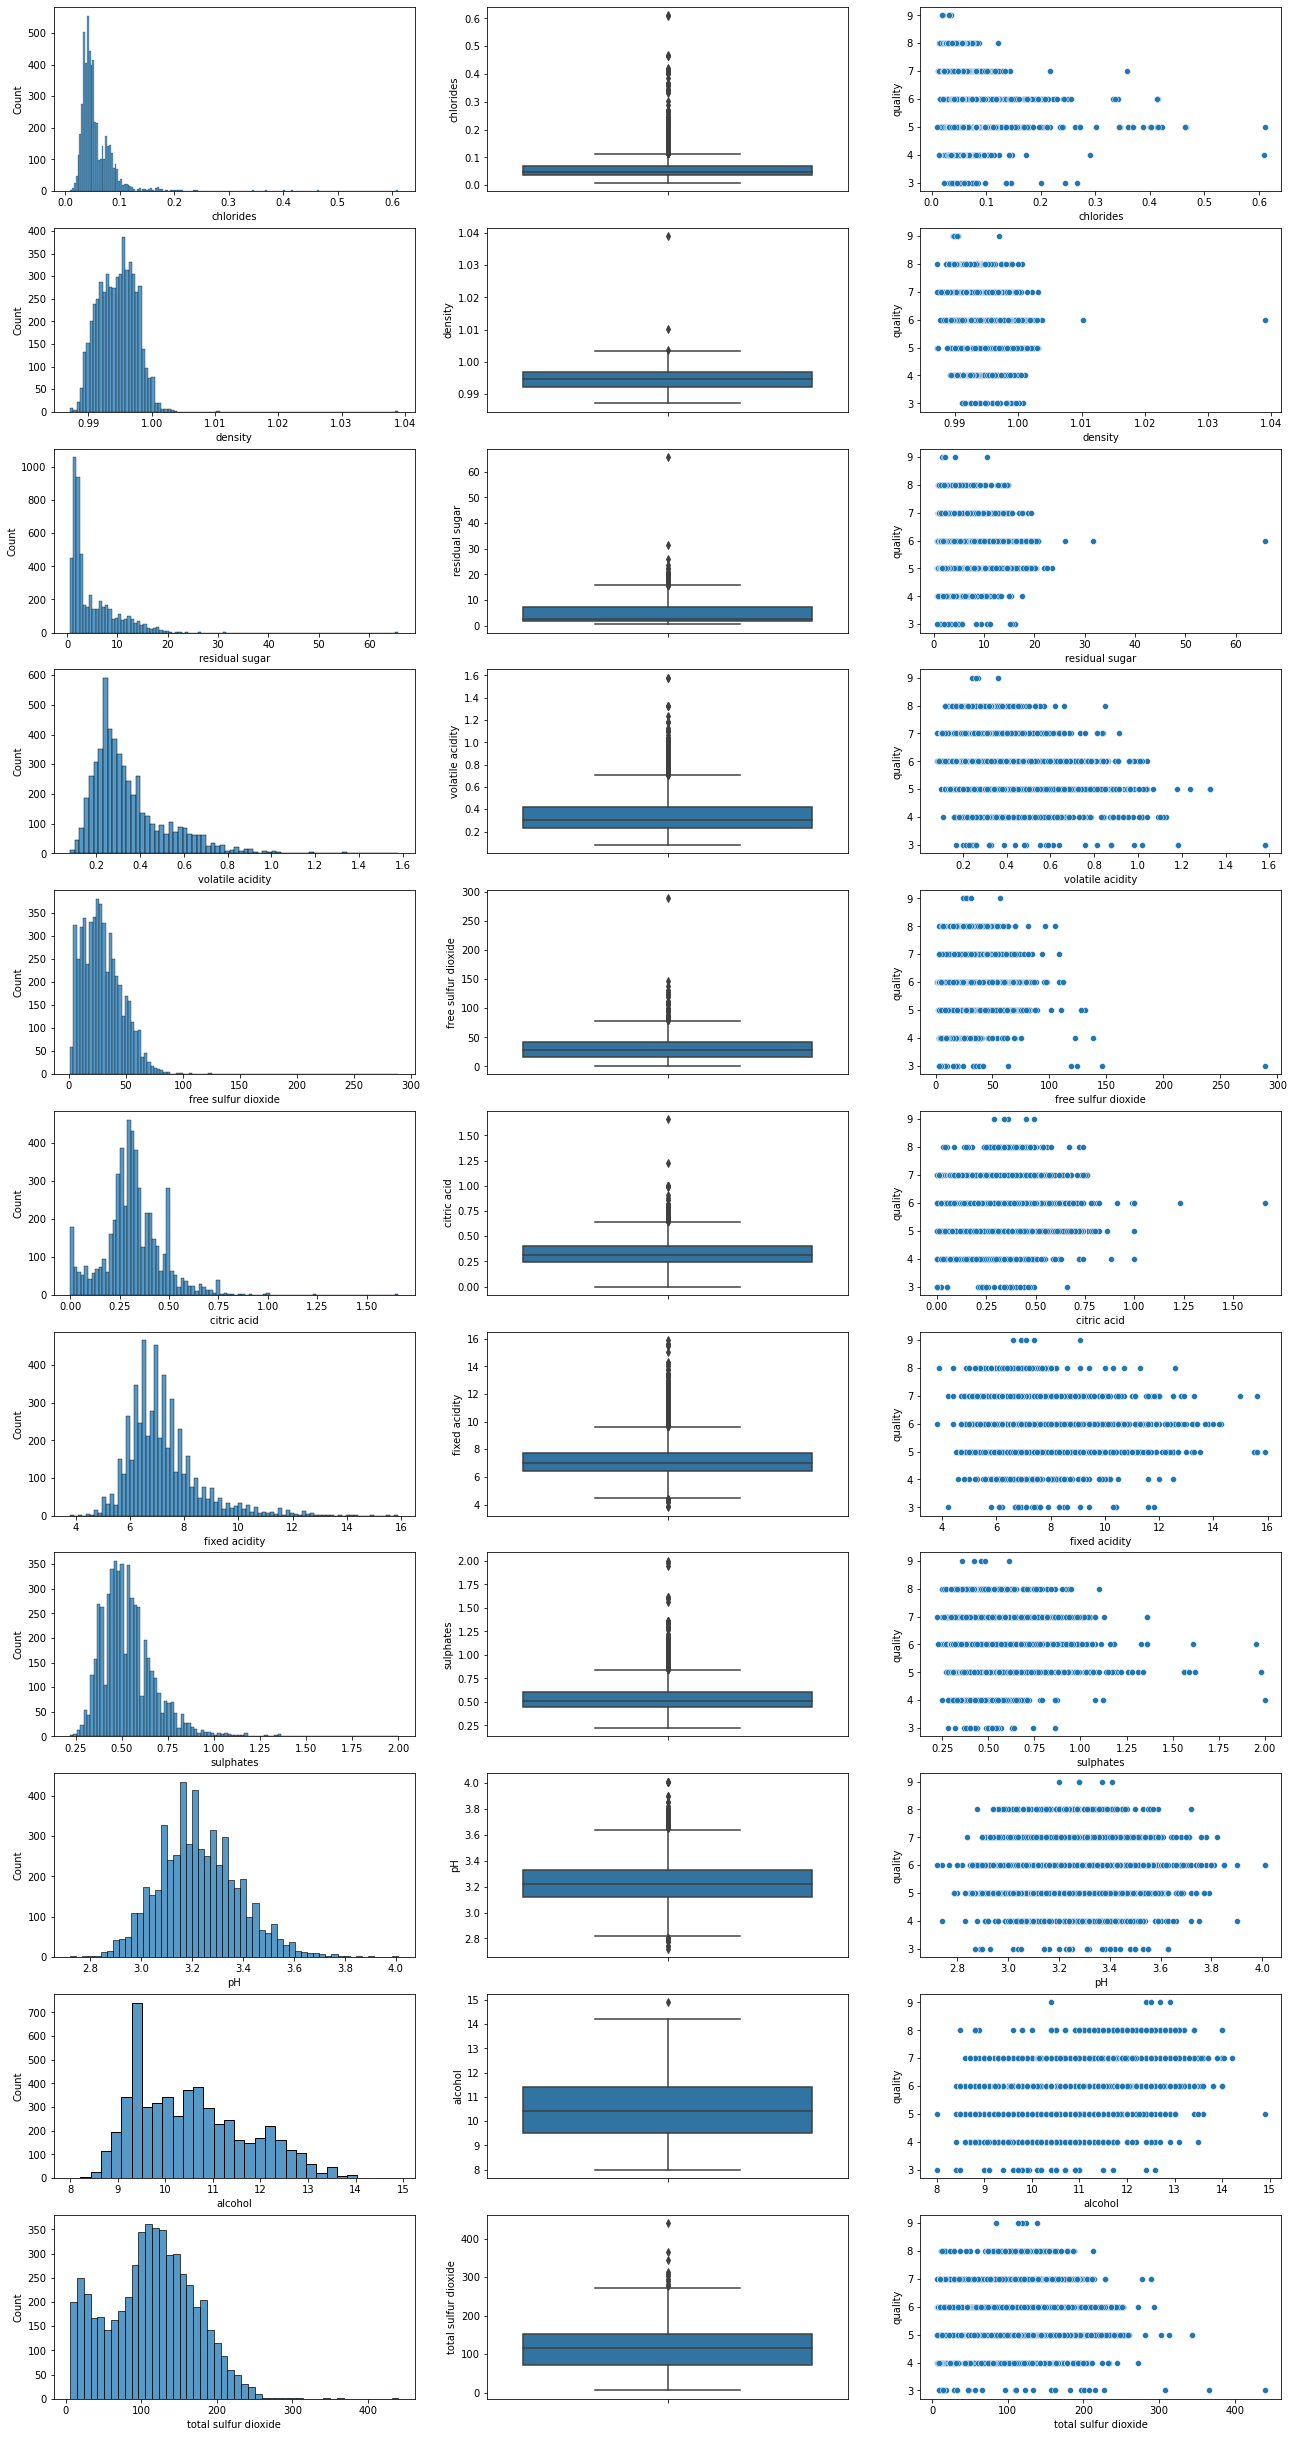

In [138]:
n = len(num_cols)
fig,axes = plt.subplots(n,3,figsize=(22,n*4))
for i in range(n):
    col = num_cols[i]
#     sns.histplot(data=train_data,x=col,hue=target_col,ax=axes[i][0])
#     sns.boxplot(data = train_data,x=target_col,y=col,ax=axes[i][1])
    sns.histplot(data=train_data,x=col,ax=axes[i][0])
    sns.boxplot(data = train_data,y=col,ax=axes[i][1])
    sns.scatterplot(data = train_data,x=col,y=target_col,ax=axes[i][2])

##### Preprocessing

In [139]:
train_data.isna().sum()

citric acid             0
quality                 0
chlorides               0
alcohol                 0
total sulfur dioxide    0
density                 0
residual sugar          0
free sulfur dioxide     0
fixed acidity           0
sulphates               0
pH                      0
volatile acidity        0
dtype: int64

In [140]:
train_data = train_data.dropna()
print(train_data.shape)

(5402, 12)


In [141]:
### Removing outliers

def get_outliers(col,df,a = 3.0):
    m_ = df[col].mean()
    s_ = df[col].std()
    up_lim = m_ + a*s_
    low_lim = m_ - a*s_
    outs = ((df[col] < low_lim) | (df[col] > up_lim))
    return outs

In [142]:
proc_df = train_data.copy()

for col in all_cols+[target_col]:
    outs = get_outliers(col,proc_df)
    out_count = sum(outs)
    print(f'{col} : {out_count}')
    if out_count > 0:
        print(f'Removing outs from : {col}')
        proc_df = proc_df[outs == False]
print(proc_df.shape)

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [165]:
proc_df = train_data.copy(deep=True)

In [166]:
X = proc_df[all_cols].values
y = proc_df[target_col].values
print(X.shape,y.shape)

(5402, 11) (5402,)


In [167]:
N_classes=10
def make_one_hot(N_classes,y):
    y_hot = np.zeros((len(y),N_classes))
    for i in range(len(y)):
        y_hot[i,y[i]] = 1
    return y_hot

y_hot = make_one_hot(N_classes,y)

In [168]:
X_train,X_test,y_train,y_test = train_test_split(X,y_hot,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(4321, 11) (4321, 10)
(1081, 11) (1081, 10)


In [169]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
import tensorflow.keras.backend as K

print(tf.__version__)

2.6.4


In [170]:
input_shape = [len(all_cols)]
n_epochs = 150
batch_size = 16
lr = 0.001
d_rate = 0.5
NUM_Classes = N_classes

def clip_act(x):
    return K.clip(x,0.0,9.0)

In [171]:
ann_model = keras.Sequential([
    layers.Dense(16,activation=None,input_shape=input_shape),
    layers.Dropout(d_rate),
    layers.LeakyReLU(),
    layers.Dense(16),
    layers.Dropout(d_rate),
    layers.LeakyReLU(),
    layers.Dense(32),
    layers.Dropout(d_rate),
    layers.LeakyReLU(),
    layers.Dense(16),
    layers.Dropout(d_rate),
    layers.LeakyReLU(),
    layers.Dense(N_classes,activation='softmax')
])

ann_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 16)                192       
_________________________________________________________________
dropout_43 (Dropout)         (None, 16)                0         
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 16)                272       
_________________________________________________________________
dropout_44 (Dropout)         (None, 16)                0         
_________________________________________________________________
leaky_re_lu_44 (LeakyReLU)   (None, 16)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 32)              

In [172]:
ann_model.compile(
    optimizer=keras.optimizers.Adam(lr),
    loss = tfa.losses.WeightedKappaLoss(num_classes=N_classes,weightage='quadratic'),
    metrics=[tfa.metrics.CohenKappa(num_classes=N_classes,weightage='quadratic',sparse_labels=False)]
)

In [173]:
r = ann_model.fit(
    X_train_scaled,y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(X_test_scaled,y_test)
)

Epoch 1/150
271/271 [==============================] - 3s 5ms/step - loss: -0.0275 - cohen_kappa: 0.0478 - val_loss: -0.1489 - val_cohen_kappa: 0.2073
Epoch 2/150
271/271 [==============================] - 1s 3ms/step - loss: -0.1727 - cohen_kappa: 0.1893 - val_loss: -0.2873 - val_cohen_kappa: 0.2506
Epoch 3/150
271/271 [==============================] - 1s 3ms/step - loss: -0.2464 - cohen_kappa: 0.2346 - val_loss: -0.3772 - val_cohen_kappa: 0.3639
Epoch 4/150
271/271 [==============================] - 1s 3ms/step - loss: -0.3453 - cohen_kappa: 0.3115 - val_loss: -0.4507 - val_cohen_kappa: 0.3691
Epoch 5/150
271/271 [==============================] - 1s 4ms/step - loss: -0.3861 - cohen_kappa: 0.3331 - val_loss: -0.4762 - val_cohen_kappa: 0.3873
Epoch 6/150
271/271 [==============================] - 1s 4ms/step - loss: -0.4168 - cohen_kappa: 0.3583 - val_loss: -0.5012 - val_cohen_kappa: 0.3941
Epoch 7/150
271/271 [==============================] - 1s 4ms/step - loss: -0.4450 - cohen_kap

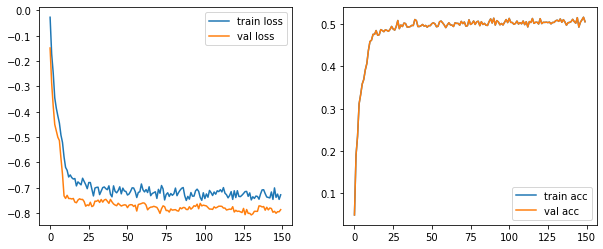

In [174]:
_,axes = plt.subplots(1,2,figsize=(10,4))
axes[0].plot(r.history['loss'],label ='train loss')
axes[0].plot(r.history['val_loss'],label='val loss')
axes[0].legend()

axes[1].plot(r.history['cohen_kappa'],label = 'train acc')
axes[1].plot(r.history['cohen_kappa'],label = 'val acc')

axes[1].legend()

In [175]:
def test_predict(pred_func,cols,scaler,sub_no=1):
    test_df = pd.read_csv(test_pth)
#     print(test_df.shape)
    X_scaled = scaler.transform(test_df[cols].values)
    preds = pred_func(X_scaled)
    test_df['quality'] = np.argmax(preds,axis=-1)
    subs = test_df[['Id','quality']]
    subs.to_csv('submissions_{}.csv'.format(sub_no),index=False)
    print('Predictions saved to submissions_{}.csv'.format(sub_no))
    return subs

In [176]:
test_predict(ann_model.predict,all_cols,scaler)

Predictions saved to submissions_1.csv


,Id,quality
0,2056,5
1,2057,5
2,2058,5
3,2059,7
4,2060,7
...,...,...
1367,3423,5
1368,3424,7
1369,3425,5
1370,3426,5


In [73]:
pred = ann_model.predict(X_test_scaled)